In [1]:
import pandas as pd
arrest = pd.read_csv('arrest-data-from-2010-to-present.csv')
crime = pd.read_csv('crime-data-from-2010-to-present.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'crime-data-from-2010-to-present.csv'

In [ ]:
#custom function
from features import *
from Kmeans_runner import KMenas_custom_runner
from distribution_plot import plot_distribution

#import package
import seaborn as sns
from sklearn.manifold import TSNE, MDS

import warnings
warnings.filterwarnings('ignore')

In [ ]:
arrest_feature_df, label = arrest_features_label(arrest)
# crime_feature_df = get_crime_features(crime)

In [6]:
arrest_feature_df

,day,month,hour,minute,area,lat,lon,Age,D,F_x,...,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,F_y,M_y
0,0.7,0.454545,0.166667,0.000000,0.70,0.776950,0.546278,0.329787,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0.7,0.454545,0.083333,0.677966,0.85,0.381114,0.810787,0.212766,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.7,0.454545,0.666667,0.254237,0.55,0.399560,0.735059,0.148936,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.7,0.454545,0.000000,0.000000,0.65,0.538501,0.519310,0.372340,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.7,0.454545,0.291667,0.423729,0.35,0.573193,0.432794,0.276596,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208255,0.0,0.000000,0.916667,0.000000,0.60,0.487561,0.867098,0.436170,0,0,...,0,0,1,0,0,0,0,0,0,1
208256,0.0,0.000000,0.708333,0.423729,0.75,0.897275,0.609061,0.170213,0,1,...,0,0,0,0,0,0,0,0,0,1
208257,0.0,0.000000,0.875000,0.847458,0.55,0.454730,0.687810,0.159574,0,1,...,0,0,0,0,0,0,0,0,0,1
208258,0.0,0.000000,0.916667,0.254237,0.50,0.684211,0.987918,0.127660,0,0,...,0,0,0,0,1,0,0,0,0,1


In [5]:
label = arrest['Descent Code']
arrest_kmeans = KMenas_custom_runner(label, arrest_feature_df, 5, 200, 2)
#parameters: label_series, df_feature, num_cluster, num_iter, order
#order 2 uses Euclidean distance for means; 1 uses Manhattan distance for medians

0 th iteration:
Early Stopped at Iteration 37


In [6]:
result_df = arrest_kmeans.get_results_df()
centers = arrest_kmeans.get_center()
loss = arrest_kmeans.get_loss()

In [8]:
df_result_old = pd.read_csv('clustered_arrest.csv')

In [20]:
grouping = df_result_old.grouping[:208260]
label = label.reset_index()['Descent Code']
result_df = pd.concat({'race_label':label, 
                        'grouping':pd.Series(grouping)}, axis=1) 

In [21]:
result_df

,race_label,grouping
0,O,0.0
1,H,1.0
2,B,2.0
3,H,1.0
4,B,1.0
...,...,...
208255,H,3.0
208256,H,2.0
208257,B,2.0
208258,H,3.0


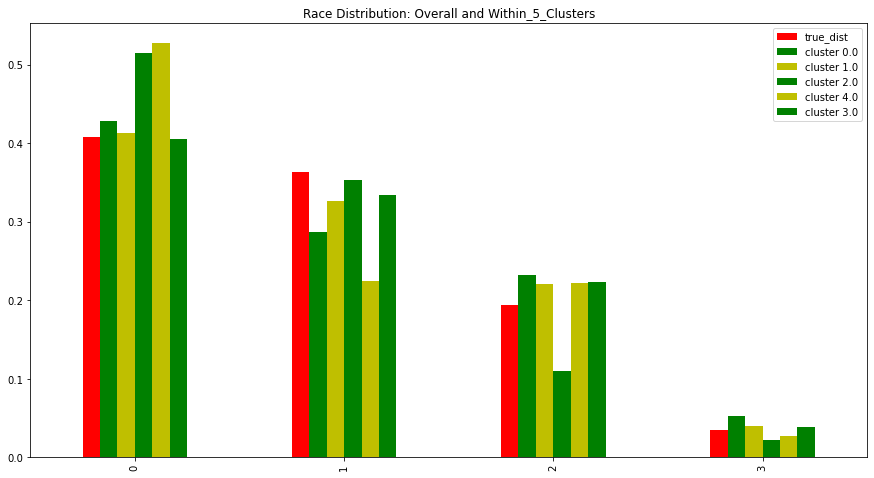

In [22]:
plot_distribution(result_df)

In [24]:
#plot cluster

rnd_indices = np.random.choice(208260, size=10000)

X = arrest_feature_df.values.tolist()
rnd_X = [X[i] for i in rnd_indices]

pred = result_df.grouping.tolist() 
rnd_pred = [pred[i] for i in rnd_indices]

y = result_df.race_label.tolist()
rnd_y = [y[i] for i in rnd_indices]

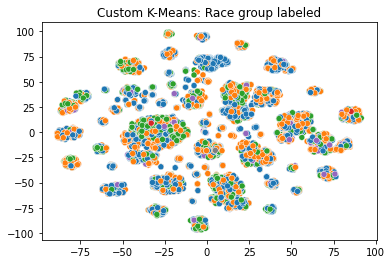

In [25]:
#race group
dims = TSNE(random_state=42).fit_transform(rnd_X)
dim1, dim2 = dims[:, 0], dims[:, 1]
sns.scatterplot(x=dim1, y=dim2, hue=rnd_y, palette='tab10', legend=False)
plt.title('Custom K-Means: Race group labeled');

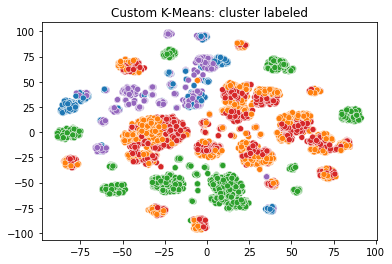

In [26]:
#cluster labeled
sns.scatterplot(x=dim1, y=dim2, hue=rnd_pred, palette='tab10', legend=False)
plt.title('Custom K-Means: cluster labeled');

In [31]:
result_df

,race_label,grouping
0,O,0.0
1,H,1.0
2,B,2.0
3,H,1.0
4,B,1.0
...,...,...
208255,H,3.0
208256,H,2.0
208257,B,2.0
208258,H,3.0


In [32]:
arrest_feature_df['race_label'] = result_df['race_label']
arrest_feature_df['grouping'] = result_df['grouping']
arrest_feature_df

,day,month,hour,minute,area,lat,lon,Age,D,F_x,...,22.0,23.0,24.0,25.0,26.0,27.0,F_y,M_y,race_label,grouping
0,0.7,0.454545,0.166667,0.000000,0.70,0.776950,0.546278,0.329787,0,0,...,1,0,0,0,0,0,1,0,O,0.0
1,0.7,0.454545,0.083333,0.677966,0.85,0.381114,0.810787,0.212766,0,0,...,1,0,0,0,0,0,0,1,H,1.0
2,0.7,0.454545,0.666667,0.254237,0.55,0.399560,0.735059,0.148936,0,1,...,0,0,0,0,0,0,0,1,B,2.0
3,0.7,0.454545,0.000000,0.000000,0.65,0.538501,0.519310,0.372340,0,0,...,1,0,0,0,0,0,0,1,H,1.0
4,0.7,0.454545,0.291667,0.423729,0.35,0.573193,0.432794,0.276596,0,0,...,0,1,0,0,0,0,0,1,B,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208255,0.0,0.000000,0.916667,0.000000,0.60,0.487561,0.867098,0.436170,0,0,...,1,0,0,0,0,0,0,1,H,3.0
208256,0.0,0.000000,0.708333,0.423729,0.75,0.897275,0.609061,0.170213,0,1,...,0,0,0,0,0,0,0,1,H,2.0
208257,0.0,0.000000,0.875000,0.847458,0.55,0.454730,0.687810,0.159574,0,1,...,0,0,0,0,0,0,0,1,B,2.0
208258,0.0,0.000000,0.916667,0.254237,0.50,0.684211,0.987918,0.127660,0,0,...,0,0,1,0,0,0,0,1,H,3.0


In [33]:
arrest_feature_df.to_csv('clustered_arrest.csv')